In [1]:
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt
import io

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris=pd.read_csv(url, names=['slength','swidth','plength','pwidth','species'])
iris.head()

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#iris.groupby('species').size().plot(kind='pie', autopct='%1.1f%%' ,ylabel="")

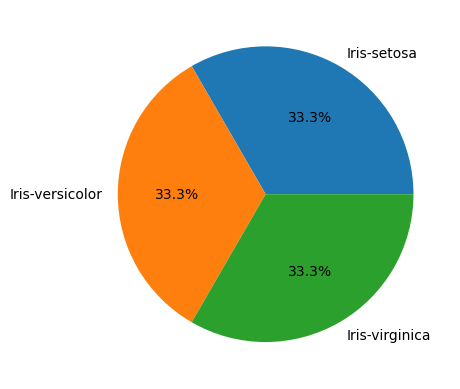

In [16]:
plt.pie(iris.groupby('species').size(),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], autopct='%1.1f%%')
plt.show()

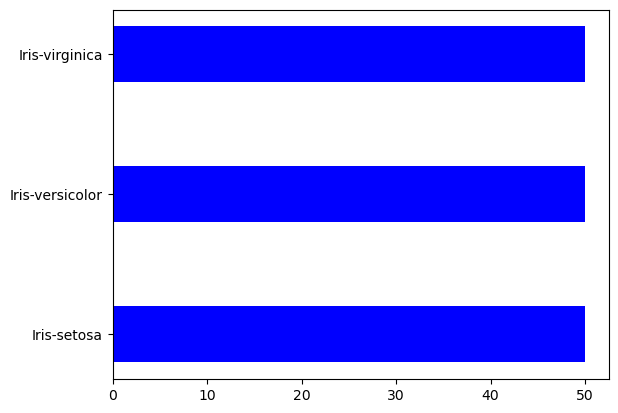

In [27]:
plt.barh(iris['species'].unique(),iris.groupby('species').size(), height=0.4, color='blue')
plt.show()

In [36]:
iris_s=iris.loc[iris['species']=='Iris-setosa']

In [37]:
iris_s.head()

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


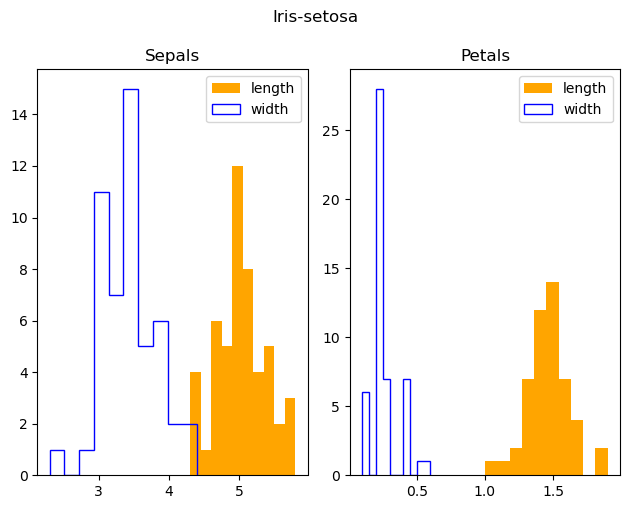

In [48]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(iris_s['slength'],histtype='stepfilled', color='orange', label='length')
axs[0].hist(iris_s['swidth'],histtype='step', color='blue', label='width')
axs[0].legend()
axs[0].set_title('Sepals')

axs[1].hist(iris_s['plength'],histtype='stepfilled', color='orange', label='length')
axs[1].hist(iris_s['pwidth'],histtype='step', color='blue', label='width')
axs[1].legend()
axs[1].set_title('Petals')

fig.tight_layout()
fig.suptitle('Iris-setosa', y=1.05 )
plt.show()

In [64]:
#color=np.repeat(np.array(['red', 'pink', 'purple'], [50,50,50], axis=0))
colors={'Iris-setosa':'red', 'Iris-versicolor':'pink', 'Iris-virginica':'purple'}
df1=iris['species'].map(colors)

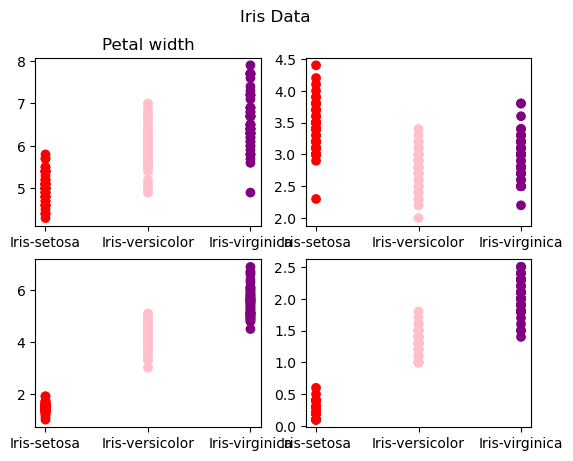

In [123]:
fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].scatter(iris['species'],iris['slength'], c=iris['species'].map(colors))
axs[0,0].set_title('Sepal length')
axs[0,1].scatter(iris['species'],iris['swidth'], c=iris['species'].map(colors))
axs[0,0].set_title('Sepal width')
axs[1,0].scatter(iris['species'],iris['plength'], c=iris['species'].map(colors))
axs[0,0].set_title('Petal length')
axs[1,1].scatter(iris['species'],iris['pwidth'], c=iris['species'].map(colors))
axs[0,0].set_title('Petal width')
fig.suptitle('Iris Data') 
plt.show()

In [124]:
grouped=iris.groupby('species')
grouped.mean()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [125]:
grouped.median()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [126]:
grouped.var()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


In [127]:
grouped.std()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [144]:
def find_iqr(x):
    return np.subtract(*np.percentile(x,[75,25]))

In [145]:
grouped['plength'].apply(find_iqr)

species
Iris-setosa        0.175
Iris-versicolor    0.600
Iris-virginica     0.775
Name: plength, dtype: float64

In [146]:
grouped.describe()

slength                                             swidth  \
                  count   mean       std  min    25%  50%  75%  max  count   
species                                                                      
Iris-setosa        50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   50.0   
Iris-versicolor    50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   50.0   
Iris-virginica     50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   50.0   

                        ... plength      pwidth                             \
                  mean  ...     75%  max  count   mean       std  min  25%   
species                 ...                                                  
Iris-setosa      3.418  ...   1.575  1.9   50.0  0.244  0.107210  0.1  0.2   
Iris-versicolor  2.770  ...   4.600  5.1   50.0  1.326  0.197753  1.0  1.2   
Iris-virginica   2.974  ...   5.875  6.9   50.0  2.026  0.274650  1.4  1.8   

                                
                 50%  75%  max  
species                         
Iris-setosa      0.2  0.3  0.6  
Iris-versicolor  1.3  1.5  1.8  
Iris-virginica   2.0  2.3  2.5  

[3 rows x 32 columns]

In [147]:
iris_s.describe()

,slength,swidth,plength,pwidth
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [148]:
grouped.skew()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,0.120087,0.107053,0.071846,1.197243
Iris-versicolor,0.105378,-0.362845,-0.606508,-0.031180
Iris-virginica,0.118015,0.365949,0.549445,-0.129477


In [149]:
grouped.apply(pd.DataFrame.kurt, numeric_only=True)

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,-0.252689,0.889251,1.031626,1.566442
Iris-versicolor,-0.533010,-0.366237,0.047903,-0.410059
Iris-virginica,0.032904,0.706071,-0.153779,-0.602264


In [152]:
iris_v=iris[iris['species']=='Iris-virginica']

In [153]:
from scipy.stats import norm

In [155]:
iris_v.mean(numeric_only=True)

slength    6.588
swidth     2.974
plength    5.552
pwidth     2.026
dtype: float64

In [157]:
iris_v.std(numeric_only=True)

slength    0.635880
swidth     0.322497
plength    0.551895
pwidth     0.274650
dtype: float64

In [160]:
x=np.linspace(4,10,80)

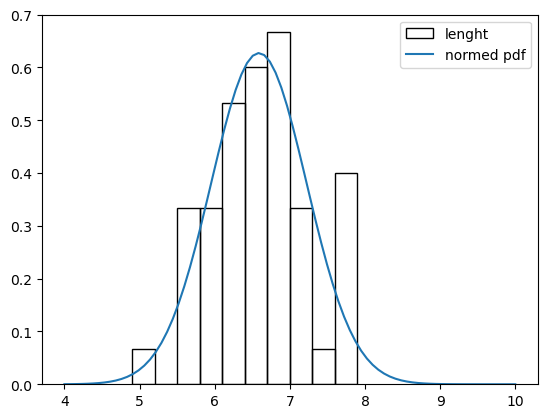

In [168]:
plt.hist(iris_v['slength'],density='True', color='blue',histtype='bar', fill=False, label='lenght' )
plt.plot(x,norm.pdf(x,6.588,0.635880), label='normed pdf')
plt.legend()
plt.show()

In [173]:
slength=iris[['slength', 'species']]
slength

,slength,species
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa
3,4.6,Iris-setosa
4,5.0,Iris-setosa
...,...,...
145,6.7,Iris-virginica
146,6.3,Iris-virginica
147,6.5,Iris-virginica
148,6.2,Iris-virginica


In [177]:
import seaborn as sns

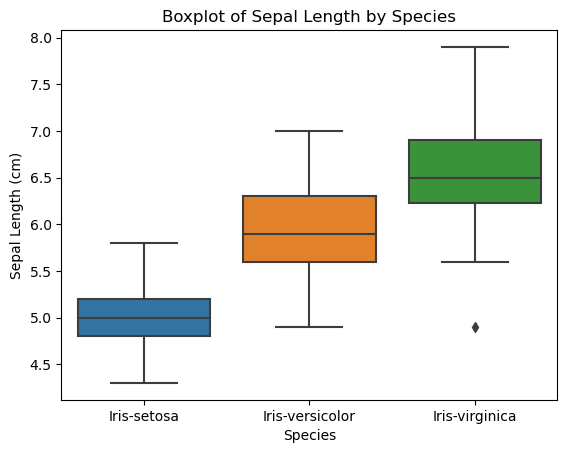

In [178]:
sns.boxplot(x='species', y='slength', data=iris)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Boxplot of Sepal Length by Species')
plt.show()

In [179]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='slength', ylabel='slength'>,
        <Axes: xlabel='swidth', ylabel='slength'>,
        <Axes: xlabel='plength', ylabel='slength'>,
        <Axes: xlabel='pwidth', ylabel='slength'>],
       [<Axes: xlabel='slength', ylabel='swidth'>,
        <Axes: xlabel='swidth', ylabel='swidth'>,
        <Axes: xlabel='plength', ylabel='swidth'>,
        <Axes: xlabel='pwidth', ylabel='swidth'>],
       [<Axes: xlabel='slength', ylabel='plength'>,
        <Axes: xlabel='swidth', ylabel='plength'>,
        <Axes: xlabel='plength', ylabel='plength'>,
        <Axes: xlabel='pwidth', ylabel='plength'>],
       [<Axes: xlabel='slength', ylabel='pwidth'>,
        <Axes: xlabel='swidth', ylabel='pwidth'>,
        <Axes: xlabel='plength', ylabel='pwidth'>,
        <Axes: xlabel='pwidth', ylabel='pwidth'>]], dtype=object)

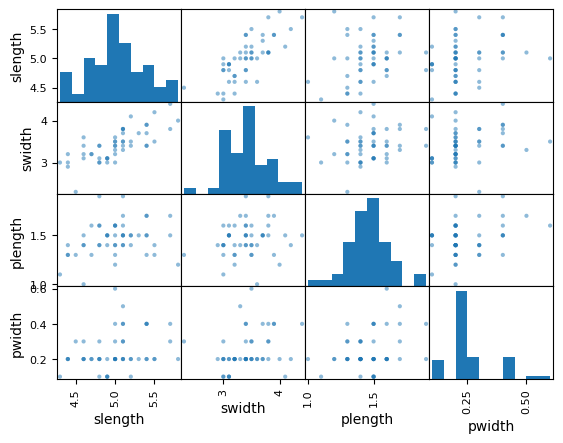

In [180]:
scatter_matrix(iris_s,diagonal='hist')

In [181]:
iris_s.corr(numeric_only=True)

,slength,swidth,plength,pwidth
slength,1.000000,0.746780,0.263874,0.279092
swidth,0.746780,1.000000,0.176695,0.279973
plength,0.263874,0.176695,1.000000,0.306308
pwidth,0.279092,0.279973,0.306308,1.000000


In [182]:
colors={'Iris-setosa':'red', 'Iris-versicolor':'pink', 'Iris-virginica':'purple'}
df1=iris['species'].map(colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


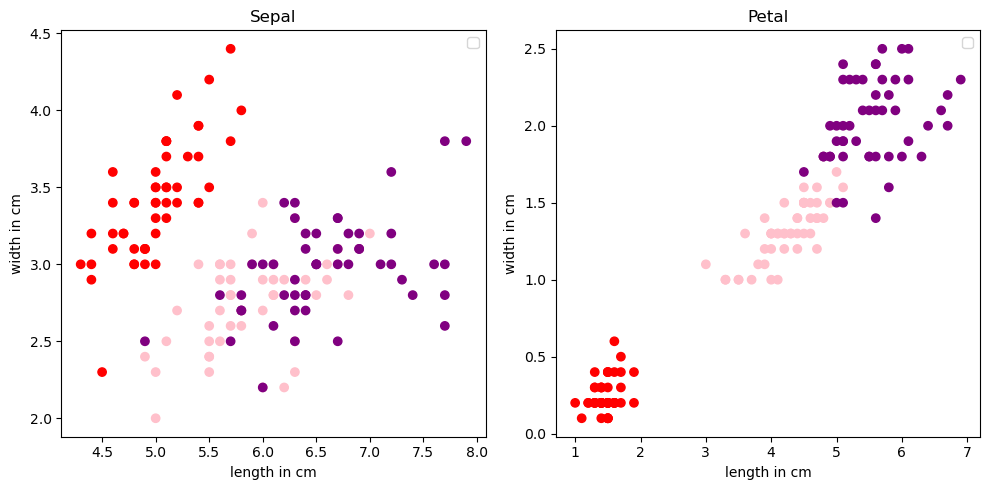

In [197]:
fig, axs=plt.subplots(1,2, figsize=(10,5), tight_layout=True)
axs[0].scatter(iris['slength'], iris['swidth'], c=iris['species'].map(colors))
axs[0].set_ylabel('width in cm')
axs[0].set_xlabel('length in cm')
axs[0].legend()
axs[0].set_title('Sepal')

axs[1].scatter(iris['plength'], iris['pwidth'], c=iris['species'].map(colors))
axs[1].set_ylabel('width in cm')
axs[1].set_xlabel('length in cm')
axs[1].legend()
axs[1].set_title('Petal')

plt.show()



### Iterating to do the same

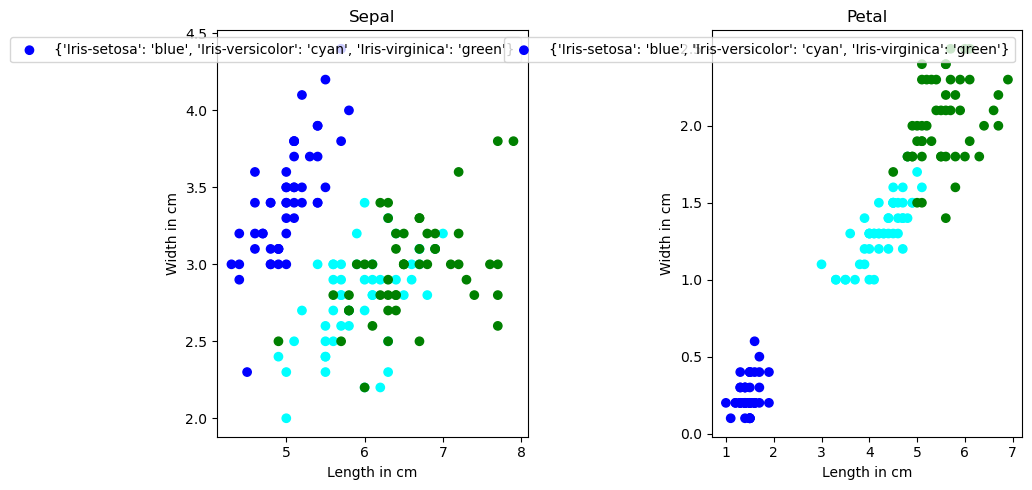

In [206]:
colors={'Iris-setosa':'blue', 'Iris-versicolor':'cyan', 'Iris-virginica':'green'}
data_to_plot = [
    {'x': 'slength', 'y': 'swidth', 'title': 'Sepal'},
    {'x': 'plength', 'y': 'pwidth', 'title': 'Petal'}
]

# Create a figure with subplots
fig, axs = plt.subplots(1, len(data_to_plot), figsize=(10, 5), tight_layout=True)

# Iterate over the data and create scatter plots
for i, plot_data in enumerate(data_to_plot):
    x_column = plot_data['x']
    y_column = plot_data['y']
    title = plot_data['title']

    axs[i].scatter(iris[x_column], iris[y_column], c=iris['species'].map(colors))
    axs[i].set_ylabel('Width in cm')
    axs[i].set_xlabel('Length in cm')
    axs[i].legend()
    axs[i].set_title(title)

# Show the plots
plt.show()

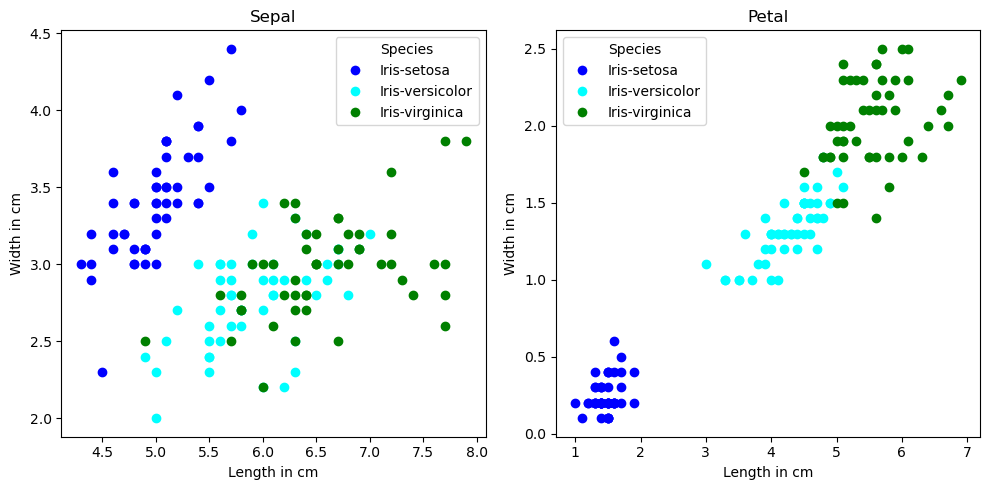

In [207]:
from matplotlib.lines import Line2D

colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'cyan', 'Iris-virginica': 'green'}

data_to_plot = [
    {'x': 'slength', 'y': 'swidth', 'title': 'Sepal'},
    {'x': 'plength', 'y': 'pwidth', 'title': 'Petal'}
]

# Create a figure with subplots
fig, axs = plt.subplots(1, len(data_to_plot), figsize=(10, 5), tight_layout=True)

# Iterate over the data and create scatter plots
for i, plot_data in enumerate(data_to_plot):
    x_column = plot_data['x']
    y_column = plot_data['y']
    title = plot_data['title']

    # Create scatter plot with colors and labels
    for species, color in colors.items():
        subset = iris[iris['species'] == species]
        axs[i].scatter(subset[x_column], subset[y_column], c=color, label=species)

    axs[i].set_ylabel('Width in cm')
    axs[i].set_xlabel('Length in cm')
    axs[i].set_title(title)

    # Add a custom legend
    custom_legend = [Line2D([0], [0], marker='o', color='w', label=label, 
                            markerfacecolor=color, markersize=8) for label, color in colors.items()]
    axs[i].legend(handles=custom_legend, title='Species')

# Show the plots
plt.show()